# **Breast Cancer Wisconsin (Diagnostic)**

# 1. Import Library
Library pandas dan numpy untuk olah data, matplotlib/seaborn untuk visualisasi, train_test_split untuk membagi data, StandardScaler untuk normalisasi, SVC sebagai model SVM, dan classification_report, confusion_matrix, accuracy_score untuk evaluasi model.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Load Dataset 
Bagian ini membaca dataset dan menampilkan 5 baris pertama agar kita bisa melihat struktur kolom dan tipe data.

In [ ]:
data = pd.read_csv('../data/cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 3. Pengecekan dan Pembersihan data
Untuk memastikan dataset bersih, melihat tipe data, dan memeriksa apakah ada nilai kosong.

In [ ]:
print("Informasi data:\n")
data.info()

print("\nCek Missing Values:\n")
data.isnull().sum()

Informasi data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# 4. Persiapan data untuk Model
Data siap untuk model: kolom tidak relevan dihapus, label diubah ke angka, dibagi menjadi data latih & uji, dan dinormalisasi.

In [8]:
# untuk hapus kolom yang tidak digunakan
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# untuk ubah label menjadi numerik
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# memisahkan fitur dan label
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("data sudah dipisahkan dan dinormalisasi")

data sudah dipisahkan dan dinormalisasi


# 5. Confusion Matrix
Menampilkan Confusion Matrix, laporan klasifikasi, dan akurasi model untuk evaluasi performa SVM.

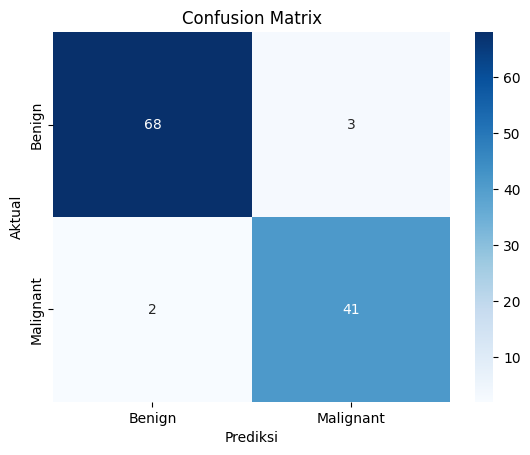

=== Laporan Evaluasi Model SVM ===

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Akurasi Model: 95.61%


In [9]:
# latih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# prediksi data uji
y_pred = svm_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.Figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print("=== Laporan Evaluasi Model SVM ===\n")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print(f"Akurasi Model: {round(accuracy_score(y_test, y_pred)*100,2)}%")


# 6.  Visualisasi Hasil Model SVM

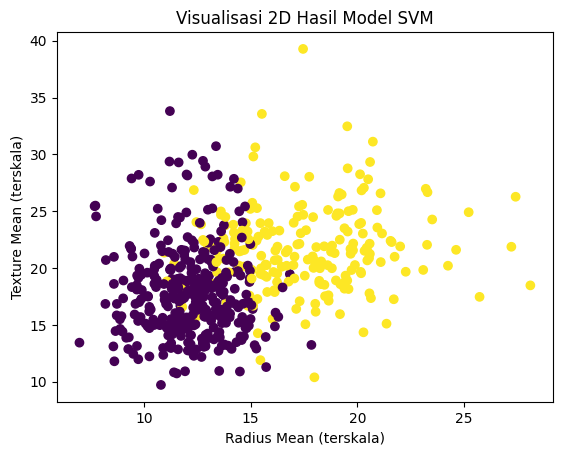

In [14]:
import matplotlib.pyplot as plt

# Scatter plot sederhana dua fitur
plt.scatter(data['radius_mean'], data['texture_mean'], c=data['diagnosis'])
plt.xlabel('Radius Mean (terskala)')
plt.ylabel('Texture Mean (terskala)')
plt.title('Visualisasi 2D Hasil Model SVM')
plt.show()

# 7. 3D Visualisasi hasil model SVM
Visualisasi 3D untuk melihat sevbaran data dan pemisahan kelas agar lebih jelas

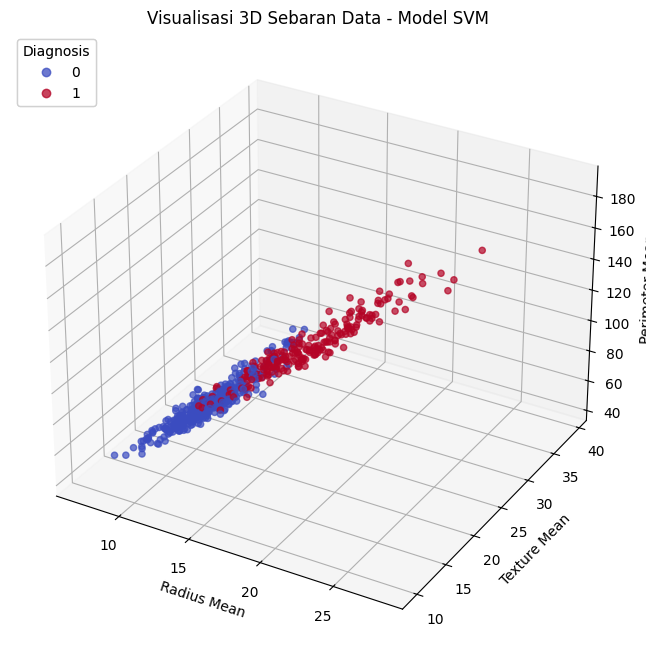

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['radius_mean']
y = data['texture_mean']
z = data['perimeter_mean']

scatter = ax.scatter(x, y, z, c=data['diagnosis'], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Perimeter Mean')
ax.set_title('Visualisasi 3D Sebaran Data - Model SVM')

legend = ax.legend(*scatter.legend_elements(), title="Diagnosis", loc="upper left")
ax.add_artist(legend)
plt.show()